In [8]:
import pandas as pd
import numpy as np
import sys
import random
from build_datasets import *
%matplotlib inline
DEVICES_TO_INCLUDE = ['LEO-BX9']
TEST_PERCENTAGE = 0.25
import sys
from tqdm import tqdm
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import linkage, dendrogram
from fastdtw import fastdtw
import build_datasets
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

WATCH_NAME = 'LEO-BX9'

In [2]:
sources_files = find_sources("./data/open-2/")

In [3]:
def exclude(d):
    device = d.replace('data/open-2/', '')
    device = device[:device.find('_')]
    return device in DEVICES_TO_INCLUDE

all_sources_files = list(filter(exclude, sources_files))
datasets, counts = cut_all_datasets_in_event(sources_files)

In [4]:

def create_sub_dataset(datasets, N_TO_PICK = 15, AppToKeepOnly="all", watch='LEO-BX9'):
    datasets_to_analysis = []
    labels_to_analysis = []

    for app in datasets[watch]:
        if AppToKeepOnly != "all" and app not in AppToKeepOnly:
            continue
        for action in datasets[watch][app]:
            already_picked = set()
            picked = -1
            label= WATCH_NAME +"_"+app+"_"+action
            events_nb = list(datasets[watch][app][action].keys())
            chosen_events = random.sample(events_nb, N_TO_PICK)
            
            
            labels_to_analysis += [label + "_" + nb for nb in chosen_events]
            datasets_to_analysis += [datasets[watch][app][action][event_nb] for event_nb in chosen_events]
                
    return datasets_to_analysis, labels_to_analysis

def compute_dtw(s1, s2, remove_zeros = True):
    xs1, ys1 = s1["xs"], s1["ys"]
    
    if remove_zeros:
        xys1 = [[x, y] for x, y in zip(xs1, ys1) if y != 0]
    else:
        xys1 = [[x, y] for x, y in zip(xs1, ys1)]
        
    xs2, ys2 = s2["xs"], s2["ys"]
    if remove_zeros:
        xys2 = [[x, y] for x, y in zip(xs2, ys2) if y != 0]
    else:
        xys2 = [[x, y] for x, y in zip(xs2, ys2)]
    
    if len(xys1) == 0:
        xys1 = [0]
    if len(xys2) == 0:
        xys2 = [0]
    distance, path = fastdtw(xys1, xys2, dist=euclidean)
    return distance


def compute_distance_mat(datasets_to_analysis, remove_zeros = True):
    dtw_mat = np.zeros((len(datasets_to_analysis), len(datasets_to_analysis)))
    for i, s1 in enumerate(datasets_to_analysis):
        print(i , "/", len(datasets_to_analysis))
        for j in range(i,len(datasets_to_analysis)):
            if i == j:
                continue
            s2 = datasets_to_analysis[j]

            dtw =  int(compute_dtw(s1, s2, remove_zeros) )
            dtw_mat[i,j] = dtw
            dtw_mat[j,i] = dtw
    return dtw_mat

def hierarchical_clustering(dtw_mat):
    dist_array = ssd.squareform(dtw_mat)
    Z = linkage(dist_array, method="ward", optimal_ordering = True)
    return Z

def plot_dendograme(Z, fname):

    fig = plt.figure(figsize=(170, 40))
    ax = fig.add_subplot(1, 1, 1)
    dendrogram(Z, ax=ax, labels = labels_to_analysis, leaf_font_size=40)#, p=13, truncate_mode = "level")
    #ax.tick_params(axis='x', which='major', labelsize=40)
    ax.tick_params(axis='y', which='major', labelsize=40)
    plt.yscale('symlog')
    fig.savefig(fname)
    




In [5]:
datasets_to_analysis, labels_to_analysis = create_sub_dataset(datasets, N_TO_PICK = 50, AppToKeepOnly = ["WashPost"])

In [6]:
labels_to_analysis

['LEO-BX9_WashPost_open_2009',
 'LEO-BX9_WashPost_open_2030',
 'LEO-BX9_WashPost_open_2018',
 'LEO-BX9_WashPost_open_2041',
 'LEO-BX9_WashPost_open_2050',
 'LEO-BX9_WashPost_open_2008',
 'LEO-BX9_WashPost_open_2021',
 'LEO-BX9_WashPost_open_2010',
 'LEO-BX9_WashPost_open_2038',
 'LEO-BX9_WashPost_open_2027',
 'LEO-BX9_WashPost_open_2046',
 'LEO-BX9_WashPost_open_2001',
 'LEO-BX9_WashPost_open_2016',
 'LEO-BX9_WashPost_open_2026',
 'LEO-BX9_WashPost_open_2004',
 'LEO-BX9_WashPost_open_2032',
 'LEO-BX9_WashPost_open_2023',
 'LEO-BX9_WashPost_open_2020',
 'LEO-BX9_WashPost_open_2037',
 'LEO-BX9_WashPost_open_2049',
 'LEO-BX9_WashPost_open_2029',
 'LEO-BX9_WashPost_open_2036',
 'LEO-BX9_WashPost_open_2040',
 'LEO-BX9_WashPost_open_2052',
 'LEO-BX9_WashPost_open_2003',
 'LEO-BX9_WashPost_open_2043',
 'LEO-BX9_WashPost_open_2047',
 'LEO-BX9_WashPost_open_2035',
 'LEO-BX9_WashPost_open_2019',
 'LEO-BX9_WashPost_open_2005',
 'LEO-BX9_WashPost_open_2015',
 'LEO-BX9_WashPost_open_2045',
 'LEO-BX

In [7]:
dtw_mat = compute_distance_mat(datasets_to_analysis, remove_zeros=True)

0 / 50
1 / 50
2 / 50
3 / 50
4 / 50
5 / 50
6 / 50
7 / 50
8 / 50
9 / 50
10 / 50
11 / 50
12 / 50
13 / 50
14 / 50
15 / 50
16 / 50
17 / 50
18 / 50
19 / 50
20 / 50
21 / 50
22 / 50
23 / 50
24 / 50
25 / 50
26 / 50
27 / 50
28 / 50
29 / 50
30 / 50
31 / 50
32 / 50
33 / 50
34 / 50
35 / 50
36 / 50
37 / 50
38 / 50
39 / 50
40 / 50
41 / 50
42 / 50
43 / 50
44 / 50
45 / 50
46 / 50
47 / 50
48 / 50
49 / 50


In [9]:
Z = hierarchical_clustering(dtw_mat)

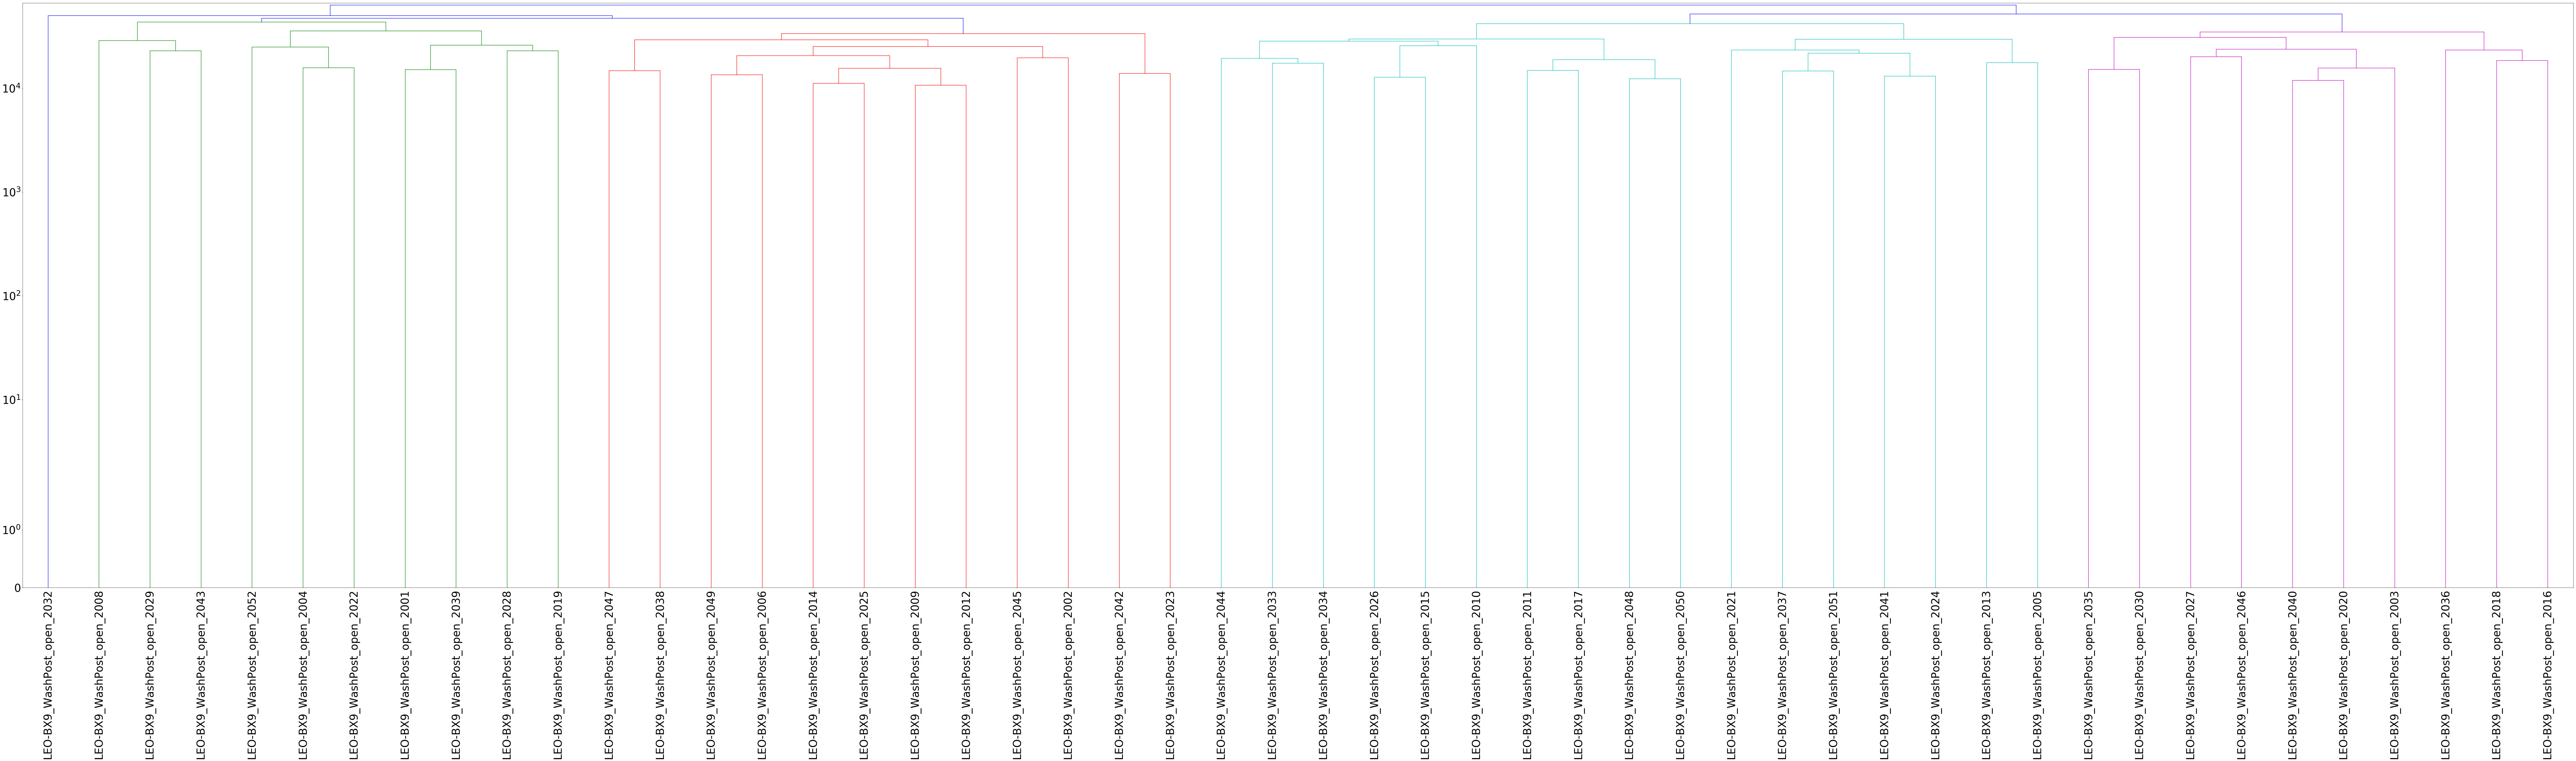

In [10]:
plot_dendograme(Z, "NoApp_NoAction_Dendogram_KeepZeros.png")

In [11]:
mean_dist = dtw_mat.mean(axis = 0).reshape(-1, 1)

In [12]:

X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=10)
prediction = clf.fit_predict(mean_dist)
neg_outlier_factor = clf.negative_outlier_factor_


    
    

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [13]:
ind = np.where(prediction == -1)
labels_to_analysis = np.array(labels_to_analysis)

less_representative_ind = np.argmin(neg_outlier_factor)
most_representative_ind = np.argmax(neg_outlier_factor)

In [14]:
outliers_val = neg_outlier_factor[ind]
less_representative = labels_to_analysis[less_representative_ind]
most_representative = labels_to_analysis[most_representative_ind]

In [15]:
print("Outliers: ", ", ".join(labels_to_analysis[ind]))
print()
print(neg_outlier_factor)
print("less representative : ", less_representative)
print("most representative : ", most_representative)


Outliers:  LEO-BX9_WashPost_open_2008, LEO-BX9_WashPost_open_2032, LEO-BX9_WashPost_open_2052, LEO-BX9_WashPost_open_2043, LEO-BX9_WashPost_open_2012

[ -1.06470525  -0.97095713  -1.0244929   -1.26514355  -1.06494291
  -2.94038585  -0.93562213  -0.9328938   -1.10624571  -1.11560592
  -1.00956307  -1.04340332  -0.91424756  -1.02959839  -1.10214905
 -10.194393    -1.24848374  -0.98640543  -0.9413241   -0.91638516
  -1.12823814  -1.06367726  -1.09509328  -1.27657711  -1.03025841
  -2.01023387  -0.91581229  -1.05724766  -0.9600547   -1.04168745
  -0.99802585  -1.00956307  -1.0244929   -0.93305881  -1.06430999
  -1.29596198  -0.92903263  -1.0012313   -1.09224215  -1.20209783
  -1.15491165  -0.99295263  -1.02762932  -0.998913    -1.10441235
  -1.10341409  -1.03179042  -1.0244929   -0.99742652  -0.92656333]
less representative :  LEO-BX9_WashPost_open_2032
most representative :  LEO-BX9_WashPost_open_2016


In [182]:
def show_cutting(source_file, timeout=10):
    xy_uncut = build_datasets.dataset_file_to_xy_features(source_file)
    xy_events = cut_in_events(xy_uncut, timeout=timeout)
    
    plt.plot(xy_uncut['xs'], xy_uncut['ys'], label='Uncut')
    for i in range(len(xy_events)):
        plt.plot(xy_events[i]['xs'], xy_events[i]['ys'], label=str(i))
    plt.xlabel('Time [s]')
    plt.ylabel('Packet size [B]')
    plt.title(source_file)
    plt.legend()
    plt.xlim(0,45)
    #plt.ylim(0.8,1.4)
    plt.show()